<H1>Project2:Football_Data_Analysis</H1>

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>
<a id='intro'></a>

## Introduction

Analysing the 11 european countries with their lead championship on the basis of list of attributes.This shows the relation between the variables,players performance rate and summery of matches

Problems for Analysing
<li>which team has the highest goal</a></li>
<li></a></li>


<li>Analysis problems</a></li>
<li>which player has highest performance according to the overall rating</a></li>

<li>which country have the highest goal</a></li>

<li>analysing the performance of goal keeper</a></li>


In [4]:
#import libraries
import sqlite3
import pandas as pd
import numpy as np
% matplotlib  inline
import matplotlib.pyplot as plt
import seaborn as sns
cnx = sqlite3.connect(r'C:\Users\anast\Downloads\database.sqlite')
cur = cnx.cursor()
results = cur.fetchall()

print(results)



[]


<a id='wrangling'></a>
## Data Wrangling
collecting data using sql query

In [5]:
country = pd.read_sql_query("select * from Country;", cnx)
league = pd.read_sql_query("select * from League ;", cnx)
match = pd.read_sql_query("select * from Match ;", cnx)
player= pd.read_sql_query("select * from Player ;", cnx)
player_attributes = pd.read_sql_query("select * from Player_Attributes ;", cnx)
team = pd.read_sql_query("select * from Team ;", cnx)
team_attributes= pd.read_sql_query("select * from Team_Attributes ;", cnx)
sqlite_sequence= pd.read_sql_query("select * from sqlite_sequence ;", cnx)






### Data Cleaning

In [7]:
#country
country.head(2)

,id,name
0,1,Belgium
1,1729,England


In [8]:
#finding the duplicate value
sum(country.duplicated())

0

In [9]:
league.head(2)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League


In [10]:
#checking missing value
league.isnull().sum()

id            0
country_id    0
name          0
dtype: int64

In [11]:
#merging two tables(country&league)
country_league=country.merge(league,left_on="id",right_on="id",how='inner')

In [12]:
country_league.head(3)

,id,name_x,country_id,name_y
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1


In [13]:
#Renaming the column 
country_league.rename(columns={'name_x':'country','name_y':'country_league'},inplace=True)

In [14]:
#remove the "id" column
country_league.drop(["id"],axis=1,inplace=True)

In [15]:
#checking missing value
country_league.isnull().sum()

country           0
country_id        0
country_league    0
dtype: int64

In [16]:
#checking the unique values
match.nunique()

id                  25979
country_id             11
league_id              11
season                  8
stage                  38
date                 1694
match_api_id        25979
home_team_api_id      299
away_team_api_id      299
home_team_goal         11
away_team_goal         10
home_player_X1          3
home_player_X2          9
home_player_X3          8
home_player_X4          7
home_player_X5          9
home_player_X6          9
home_player_X7          9
home_player_X8          9
home_player_X9          9
home_player_X10         9
home_player_X11         6
away_player_X1          3
away_player_X2          8
away_player_X3          8
away_player_X4          8
away_player_X5          9
away_player_X6          9
away_player_X7          9
away_player_X8          9
                    ...  
B365H                 121
B365D                  72
B365A                 115
BWH                   237
BWD                   133
BWA                   261
IWH                   147
IWD         

In [17]:
#create necessary columns
match_1=match[['id','country_id','league_id','season','stage','date','match_api_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal']]

In [18]:
match_1.nunique()

id                  25979
country_id             11
league_id              11
season                  8
stage                  38
date                 1694
match_api_id        25979
home_team_api_id      299
away_team_api_id      299
home_team_goal         11
away_team_goal         10
dtype: int64

In [19]:
#checking missing value
match_1.isnull().sum()

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
dtype: int64

In [20]:
country_league.head(2)

,country,country_id,country_league
0,Belgium,1,Belgium Jupiler League
1,England,1729,England Premier League


In [21]:
match_1.drop(["id"],axis=1,inplace=True)

C:\Users\anast\Anaconda_3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [22]:
#merging table(match&country_league)
country_league_match=match_1.merge(country_league,left_on="country_id",right_on="country_id")

In [23]:
sqlite_sequence.head(2)

,name,seq
0,Team,103916
1,Country,51958


In [24]:
country_league_match.head(2)

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,country_league
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League


In [25]:
#merging the data(player&player attributes)
player_attributes_1=player_attributes.merge(player,left_on="player_api_id",right_on="player_api_id",how="inner")

In [26]:
#unique values of table
country_league_match.nunique()

country_id             11
league_id              11
season                  8
stage                  38
date                 1694
match_api_id        25979
home_team_api_id      299
away_team_api_id      299
home_team_goal         11
away_team_goal         10
country                11
country_league         11
dtype: int64

In [27]:
#checking missing values
country_league_match.isnull().sum()

country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
country             0
country_league      0
dtype: int64

In [28]:
#replacing missing value
country_league_match.dropna(inplace=True)

In [29]:
#checking duplicate value
sum(country_league_match.duplicated())

0

In [30]:
player.drop(["id"],axis=1,inplace=True)

In [31]:
#checking missing value
player_attributes.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [32]:
#replacing missing value
player_attributes.dropna(inplace=True)

In [33]:
player_attributes.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [34]:
team.isnull().sum()
sum(team.duplicated())

0

In [35]:
sum(team_attributes.duplicated())

0

In [36]:
sum(sqlite_sequence.duplicated())

0

In [37]:
sqlite_sequence.isnull().sum()

name    0
seq     0
dtype: int64

In [38]:
sqlite_sequence.isnull().sum().any()

False

<a id='eda'></a>
## Exploratory Data Analysis


<a id='eda'></a>
## Number of Matches by League

Text(0,0.5,'count')

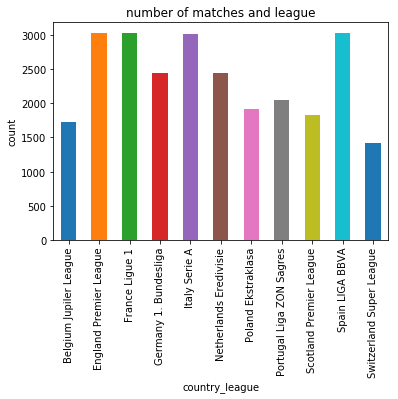

In [58]:
#visualizing the number of matches by each league.This visualization indicates there are four countries which constant number of count in each season
country_league_match.groupby(['country_league']).count()['season'].plot(kind='bar')
plt.title("number of matches and league")
plt.ylabel("count")

In [40]:
player_attributes_1.tail(10)

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
183968,183969,102359,39902,2012-08-31 00:00:00,78.0,78.0,right,medium,low,77.0,...,13.0,8.0,15.0,5.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183969,183970,102359,39902,2012-02-22 00:00:00,81.0,81.0,right,medium,low,80.0,...,13.0,8.0,15.0,5.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183970,183971,102359,39902,2011-08-30 00:00:00,81.0,81.0,right,medium,low,80.0,...,13.0,8.0,15.0,5.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183971,183972,102359,39902,2011-02-22 00:00:00,81.0,85.0,right,medium,low,81.0,...,13.0,8.0,15.0,5.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183972,183973,102359,39902,2010-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,13.0,8.0,15.0,5.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,20.0,84.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,20.0,73.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,20.0,73.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,20.0,73.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183977,183978,102359,39902,2007-02-22 00:00:00,80.0,81.0,right,medium,low,74.0,...,9.0,78.0,7.0,15.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176


In [41]:
#drop colums
player_attributes_1.drop(["player_fifa_api_id_x"],axis=1,inplace=True)


In [42]:
player_attributes_1.drop(["id_x"],axis=1,inplace=True)

In [43]:
player_attributes_1.drop(["id_y"],axis=1,inplace=True)

In [44]:
#drop colums
player_attributes_1.drop(["player_fifa_api_id_y"],axis=1,inplace=True)

In [45]:
player_attributes.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [46]:
team_attributes.dropna(inplace=True)

In [47]:
team_attributes.isnull().sum()

id                                0
team_fifa_api_id                  0
team_api_id                       0
date                              0
buildUpPlaySpeed                  0
buildUpPlaySpeedClass             0
buildUpPlayDribbling              0
buildUpPlayDribblingClass         0
buildUpPlayPassing                0
buildUpPlayPassingClass           0
buildUpPlayPositioningClass       0
chanceCreationPassing             0
chanceCreationPassingClass        0
chanceCreationCrossing            0
chanceCreationCrossingClass       0
chanceCreationShooting            0
chanceCreationShootingClass       0
chanceCreationPositioningClass    0
defencePressure                   0
defencePressureClass              0
defenceAggression                 0
defenceAggressionClass            0
defenceTeamWidth                  0
defenceTeamWidthClass             0
defenceDefenderLineClass          0
dtype: int64

In [48]:
team_attributes.drop_duplicates(inplace=True)

In [49]:
team_attributes.drop_duplicates(inplace=True)

In [50]:
#adding a column name total_goal by adding the columns home_team_goal and away_team_goal
team['total_goal']=country_league_match['home_team_goal']+country_league_match['away_team_goal']

In [51]:
#adding hte column name total_goal to country league matches
country_league_match['total_goal']=country_league_match['home_team_goal']+country_league_match['away_team_goal']

<a id='eda'></a>
## summerising the total number of goal by team

In [52]:
#Finding the total goal by adding their home team goal and away team goal
team.groupby("team_long_name")["total_goal"].sum().reset_index()

,team_long_name,total_goal
0,1. FC Kaiserslautern,4
1,1. FC Köln,3
2,1. FC Nürnberg,2
3,1. FSV Mainz 05,3
4,AC Ajaccio,3
5,AC Arles-Avignon,3
6,AC Bellinzona,0
7,ADO Den Haag,1
8,AJ Auxerre,2
9,AS Monaco,3


<a id='intro'></a>
## Total goals by country

Text(0.5,1,'total GOALS BY country')

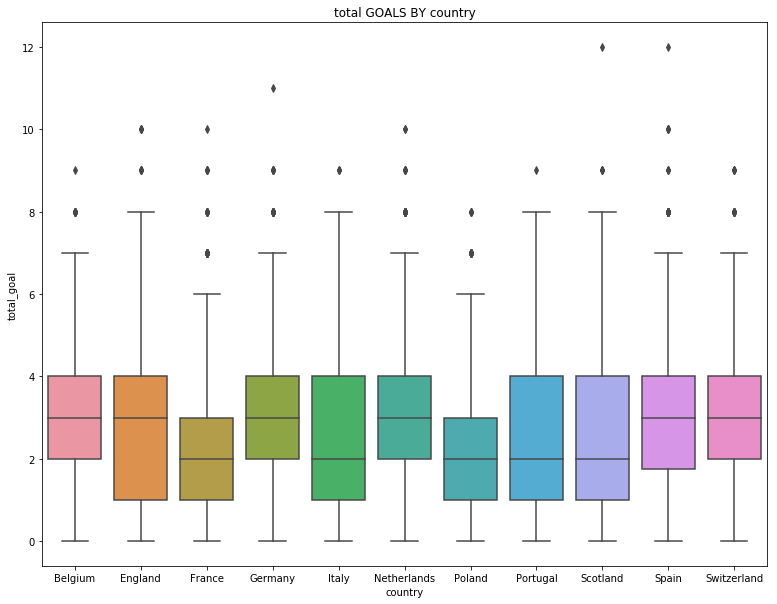

In [53]:
#visualizing the total_goal by eacvh country
plt.figure(figsize=(13,10))
sns.boxplot(x = country_league_match["country"],y =country_league_match["total_goal"])
plt.title("total GOALS BY country")


<a id='intro'></a>
## Top player according to the over all rating

Text(0,0.5,'counts')

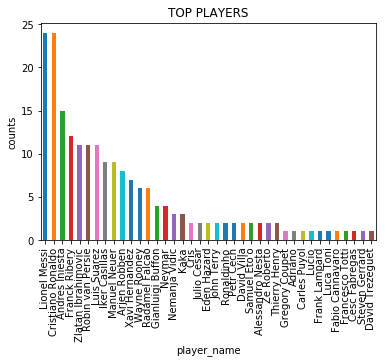

In [54]:
#finding the top player by standard rating 88
player1 = player_attributes_1[player_attributes_1["overall_rating"]  > 88 ]["player_name"].value_counts().plot(kind='bar')
plt.title("TOP PLAYERS")
plt.xlabel("player_name")
plt.ylabel("counts")

<a id='intro'></a>
## mean value of potential rate by the players preferred foot

In [55]:
player_attributes_1.groupby('preferred_foot').mean().potential

preferred_foot
left     73.506673
right    73.445383
Name: potential, dtype: float64

In [53]:
player_attributes_1.head(2)

,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187


<a id='intro'></a>
## Goal keeper performance

In [66]:
player_attributes_1.head(2)

,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187


In [67]:
country_league_match.head(2)

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,country_league,total_goal
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,2
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,0


Text(0.5,1,'Goal keeper performance')

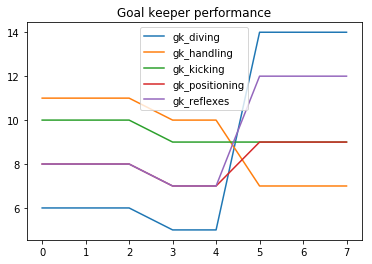

In [65]:
#The performance variation of goal keeper 
goal_keeper = player_attributes_1[['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning','gk_reflexes',]][:8].plot()

plt.title("Goal keeper performance")

## Analysis Report

<li>This dataset includes the information of +25000 matches and 11 european countries with their lead championship.I started by merging the different tables to finding relationship between them.While exploring the data using different type of visual representation like plot ,barchart ect.while counting the matches by league the belguim league has decreasing their number of matches and it has been clearly seen in the time period of 2013-1014.Engalnd Premier league,Germany1.bundaseliga,Italy serie A,Spain LIGA BBVA have the same number of matches over the years.I investigate distribution of total goal by each team.As the limitation of my python command use not able to finding the exact number of goals over the season.To finding the top player aggregate the value 88 as standard overall rating.This dataset is sufficient for analysing and finding the performance by team,player and team performance etc </li>


## Limitations
<li>The data set is sufficient to describe the properties and relationship between the variables.However the most challenging face is to create table by merging  and arise the problems on the basis of the new data set as it is not possible to create our own questions for analysis untill have limitations of concating the tables. For exapmle which player belongs to this country..etc</li>
<li>Missing alot of information while dealing with the missing values</li>


## Conclusion

<li>The project include the relationship within the variable including the team performance,the goal keeper performance over the past years,number of leagues over the season and finding the best player by visual representation.</li>